# Project || UnSupervised Machine Learning|| 

## Google Brain Ventilation Pressure

### Parts:
#### Part1 Clustering 
#### Part 2 Using clustering as feature engineering 

## Importing data

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle


In [2]:
df_original= pd.read_csv("train.csv")

print(df_original.shape)
df_original.head()

(6036000, 8)


,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [3]:
df=df_original.copy()
print(df.shape)
df.head()

(6036000, 8)


,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
 7   pressure   float64
dtypes: float64(3), int64(5)
memory usage: 368.4 MB


In [5]:
df.value_counts()

id       breath_id  R   C   time_step  u_in      u_out  pressure
1        1          20  50  0.000000   0.083334  0      5.837492    1
4023997  83915      5   10  2.567509   4.977026  1      6.399909    1
4024006  83917      20  50  0.169514   3.232038  0      6.399909    1
4024005  83917      20  50  0.135577   1.007885  0      6.259305    1
4024004  83917      20  50  0.101689   0.000000  0      6.189002    1
                                                                   ..
2011999  41743      5   20  2.691778   4.988509  1      5.696887    1
2011998  41743      5   20  2.657701   4.986374  1      5.556283    1
2011997  41743      5   20  2.623264   4.983814  1      5.415679    1
2011996  41743      5   20  2.588044   4.980697  1      5.204772    1
6036000  125749     50  10  2.638017   1.482739  1      3.869032    1
Length: 6036000, dtype: int64

In [6]:
df['R'].value_counts()

50    2410080
5     1988800
20    1637120
Name: R, dtype: int64

In [7]:
df.isnull().sum()

id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

In [8]:
df.dtypes

id             int64
breath_id      int64
R              int64
C              int64
time_step    float64
u_in         float64
u_out          int64
pressure     float64
dtype: object

In [9]:
df['breath_id'].value_counts()

16392     80
113328    80
72363     80
96935     80
92837     80
          ..
71011     80
62815     80
46423     80
38227     80
4094      80
Name: breath_id, Length: 75450, dtype: int64

In [10]:
df['R'].value_counts()

50    2410080
5     1988800
20    1637120
Name: R, dtype: int64

In [11]:
df['C'].value_counts()

10    2244720
50    1971680
20    1819600
Name: C, dtype: int64

In [12]:
df['u_out'].value_counts()

1    3745032
0    2290968
Name: u_out, dtype: int64

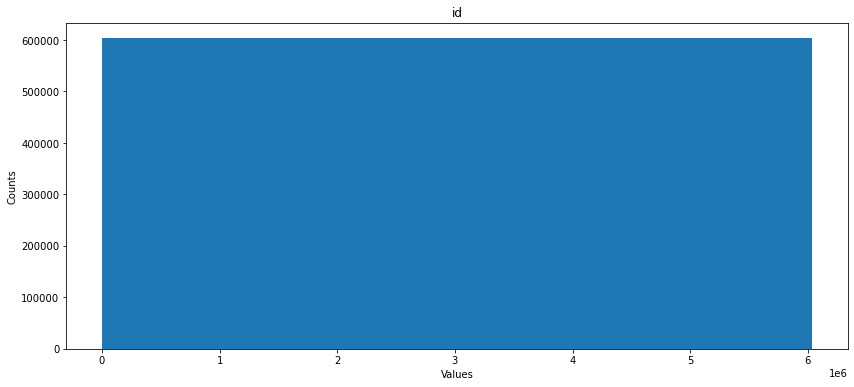

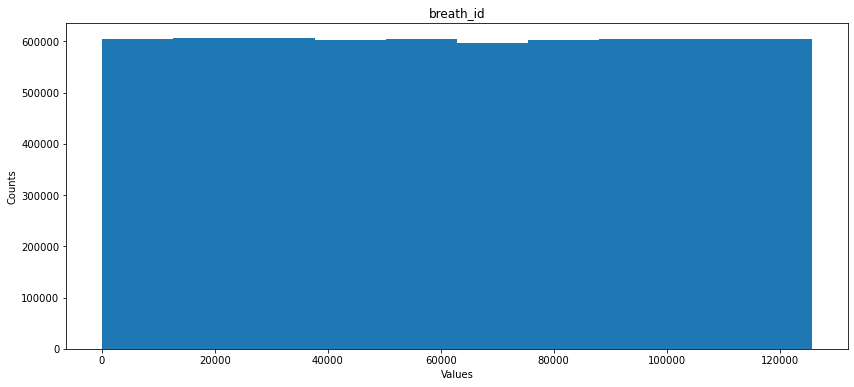

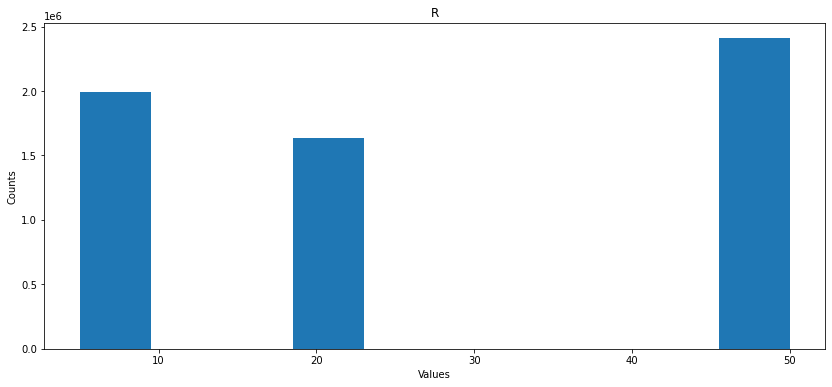

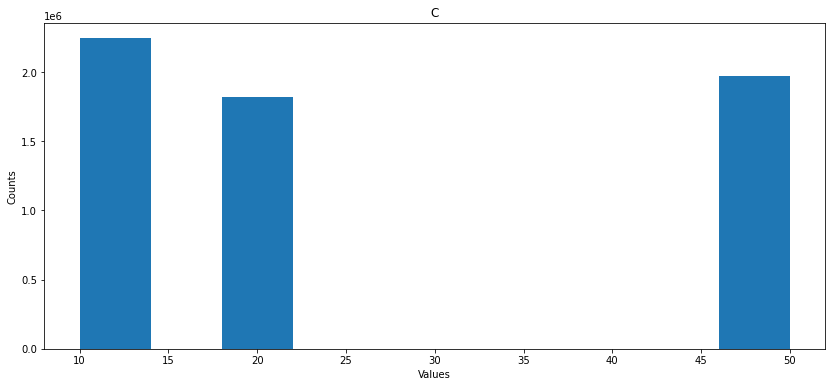

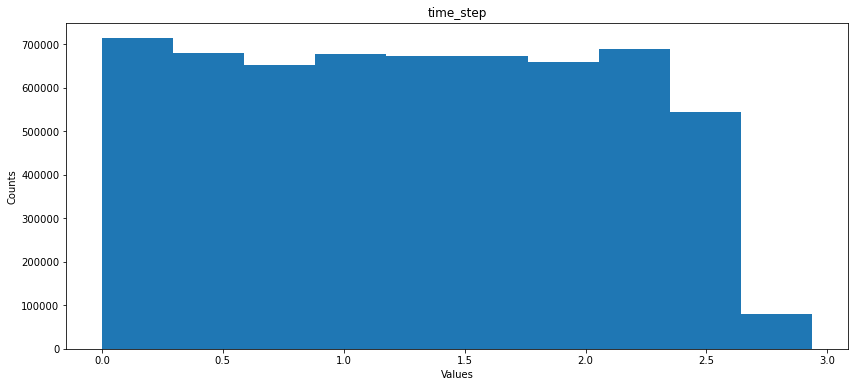

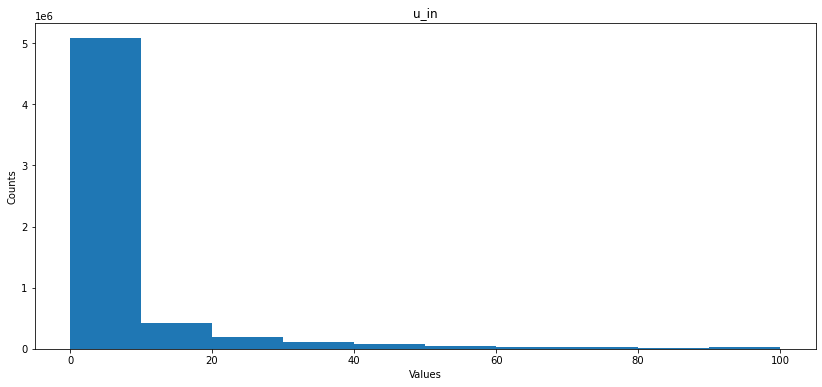

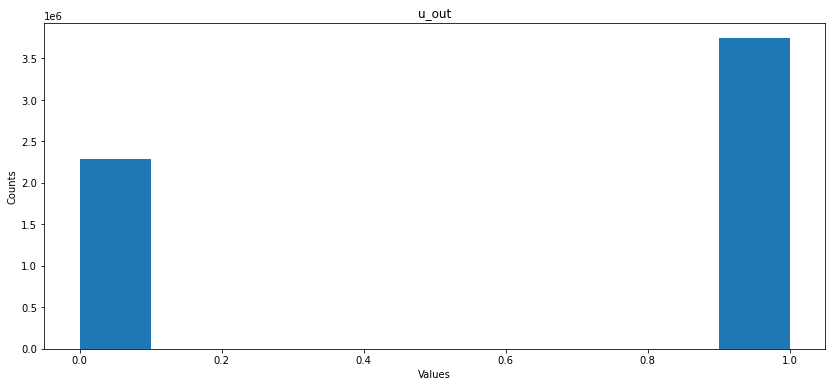

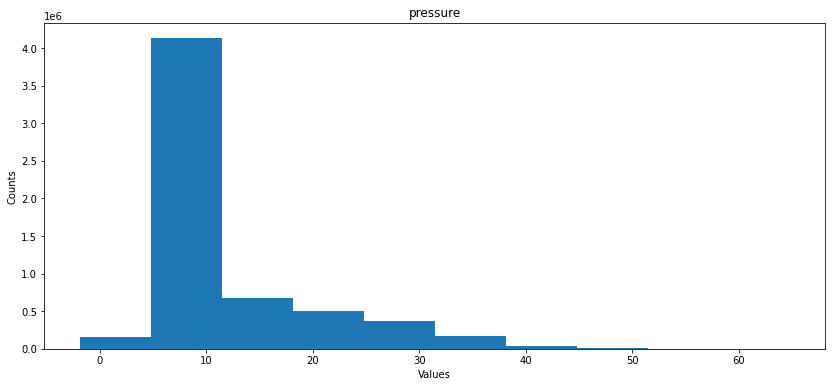

In [13]:
for i, col in enumerate(df.columns):
    # print(i)
    # print(col)
    # plt.figure(figsize=(18, 8))
    plt.figure(i,figsize=(14, 6))
    plt.hist(df[col])
    plt.title(col)
    plt.xlabel("Values")
    plt.ylabel("Counts")

## Findiing Correlation

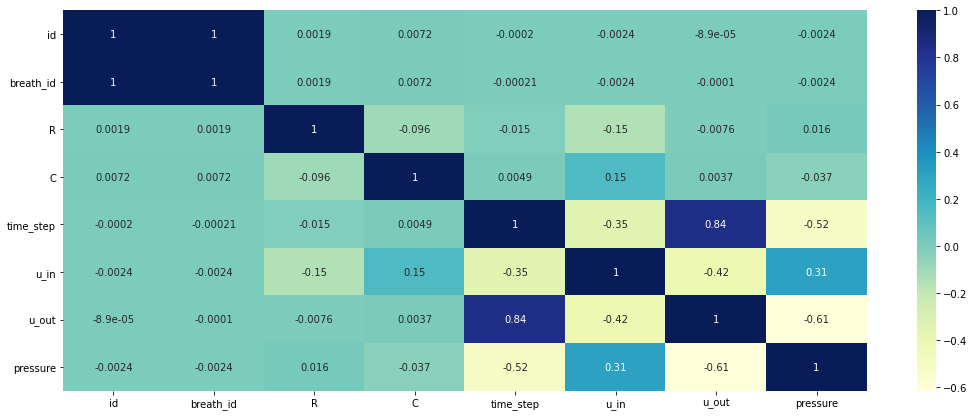

In [14]:
cor=df.corr()
# plotting correlation heatmap
import seaborn as sns
plt.figure(figsize=(18, 7))
dataplot = sns.heatmap(cor, cmap="YlGnBu", annot=True)
  
# displaying heatmap
# plt.figure(figsize=(18, 18))
# plt.figure()
plt.show()

In [15]:
corr_mat = df.corr()

# Strip out the diagonal values for the next step
for x in range(len(df.columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,id,breath_id,R,C,time_step,u_in,u_out,pressure
id,0.000000,0.999999,0.001853,0.007222,-0.000199,-0.002380,-0.000089,-0.002402
breath_id,0.999999,0.000000,0.001860,0.007222,-0.000213,-0.002378,-0.000100,-0.002394
R,0.001853,0.001860,0.000000,-0.096070,-0.014535,-0.148120,-0.007594,0.015976
C,0.007222,0.007222,-0.096070,0.000000,0.004936,0.151002,0.003720,-0.036727
time_step,-0.000199,-0.000213,-0.014535,0.004936,0.000000,-0.352276,0.839191,-0.524829
u_in,-0.002380,-0.002378,-0.148120,0.151002,-0.352276,0.000000,-0.416985,0.308136
u_out,-0.000089,-0.000100,-0.007594,0.003720,0.839191,-0.416985,0.000000,-0.614910
pressure,-0.002402,-0.002394,0.015976,-0.036727,-0.524829,0.308136,-0.614910,0.000000


In [16]:
d= df.loc[:, df.columns != 'pressure']

In [17]:
d.head()

,id,breath_id,R,C,time_step,u_in,u_out
0,1,1,20,50,0.000000,0.083334,0
1,2,1,20,50,0.033652,18.383041,0
2,3,1,20,50,0.067514,22.509278,0
3,4,1,20,50,0.101542,22.808822,0
4,5,1,20,50,0.135756,25.355850,0


## Finding the columns with skewness

In [18]:
skew_columns = (df.loc[:, df.columns != 'pressure']
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75] 
skew_columns

NumExpr defaulting to 8 threads.


u_in    3.912228
dtype: float64

In [19]:
df_skew=df_original.copy()
for col in skew_columns.index.tolist():
    df_skew[col] = np.log1p(df_skew[col])


In [20]:
df_skew.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.080043,0,5.837492
1,2,1,20,50,0.033652,2.964399,0,5.907794
2,3,1,20,50,0.067514,3.157395,0,7.876254
3,4,1,20,50,0.101542,3.170056,0,11.742872
4,5,1,20,50,0.135756,3.271690,0,12.234987


In [21]:
df_original.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [22]:
df.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


## Scaling the data

In [23]:
dr= df_original[['R','C','u_in','u_out']].copy()

In [24]:
dr.columns

Index(['R', 'C', 'u_in', 'u_out'], dtype='object')

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

dfss=df_skew.copy()
dfss[dr.columns.values] = sc.fit_transform(dfss[dr.columns.values])

dfss.head(4)

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,-0.359072,1.394522,0.000000,-1.253479,-1.278552,5.837492
1,2,1,-0.359072,1.394522,0.033652,1.380412,-1.278552,5.907794
2,3,1,-0.359072,1.394522,0.067514,1.556650,-1.278552,7.876254
3,4,1,-0.359072,1.394522,0.101542,1.568212,-1.278552,11.742872


# Clustering

## Making a smaller dataset and applying scaling

In [26]:
dfp=df_skew.sample(frac =.005)
print(dfp.shape)

dfpc=dfp.copy()

xss=df_skew[['R','C','u_in','u_out']].copy()
xss.shape

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
dfps=dfp.copy()
dfps[xss.columns.values] = sc.fit_transform(dfps[xss.columns.values])



Xps = dfps[xss.columns.values]
print(Xps.shape)
Xps.head()

(30180, 8)
(30180, 4)


,R,C,u_in,u_out
4334979,1.175229,-0.360435,0.210706,-1.286398
2323966,1.175229,-0.941646,-1.316201,0.777364
818711,-1.119223,1.383196,0.304556,0.777364
700454,-0.354406,1.383196,0.200810,0.777364
5054052,-1.119223,-0.360435,0.153182,0.777364


## Finding the number of clusters to for Kmeans

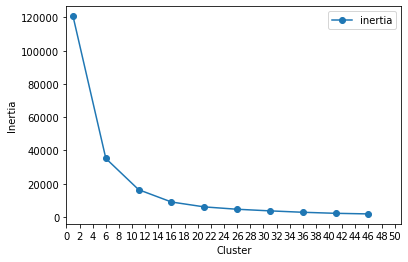

In [27]:
km_list = list()

for clust in range(1,50,5):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(Xps)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))


plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,51,2))
ax.set_xlim(0,51)
ax.set(xlabel='Cluster', ylabel='Inertia');
### END SOLUTION

This shows number of cluster should be 10

## Finding the epsilon for dbscan

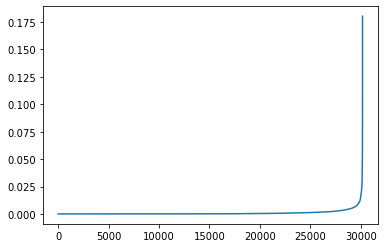

In [28]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt


neighbors = NearestNeighbors(n_neighbors=16)
neighbors_fit = neighbors.fit(Xps)
distances, indices = neighbors_fit.kneighbors(Xps)


distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [29]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.15, min_samples = 16)
db=db.fit(Xps)
print(db.labels_)


a=db.labels_
np.unique(a, return_counts = True)

[ 0  1  2 ... 13 18  1]


(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       dtype=int64),
 array([  98, 1026, 3386, 2181, 1459, 1414,  612, 1199,  997, 2101, 1141,
        1970,  726, 1223, 1510, 1349,  639,   23, 1107, 2012,  904,  123,
         673, 1079,  494,  223,  234,  102,   10,   90,   37,   18,   20],
       dtype=int64))

## Now applyinng kmeans, agglomerative and dbscan 

[ 0  1  2 ... 13 18  1]


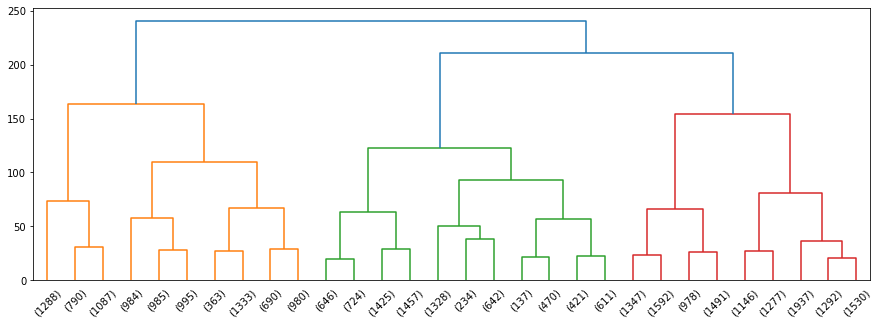

In [30]:


km = KMeans(n_clusters=10, random_state=42)
km = km.fit(Xps)

dfpc['kmeans'] = km.predict(Xps)

from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
ag = AgglomerativeClustering(n_clusters=10, linkage='ward', compute_full_tree=True)
ag = ag.fit(Xps)
dfpc['agglom'] = ag.fit_predict(Xps)


# First, we import the cluster hierarchy module from SciPy (described above) to obtain the linkage and dendrogram functions.
from scipy.cluster import hierarchy

Z = hierarchy.linkage(Xps, method='ward')

fig, ax = plt.subplots(figsize=(15,5))



den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax
                          )
### END SOLUTION


from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.15, min_samples = 16)
db=db.fit(Xps)
print(db.labels_)

dfpc['dbscan'] = db.fit_predict(Xps)

In [31]:
dfpc.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure,kmeans,agglom,dbscan
4334979,4334980,90320,50,20,0.606581,1.674389,0,14.976771,5,0,0
2323966,2323967,48331,50,10,1.455553,0.000000,1,6.259305,2,1,1
818711,818712,17005,5,50,2.285471,1.777303,1,5.345377,3,2,2
700454,700455,14514,20,50,1.856889,1.663537,1,7.524743,3,2,3
5054052,5054053,105271,5,20,1.793038,1.611308,1,5.837492,7,7,4


# For complete data

In [32]:
dfc =df_skew.copy()
X = dfss[dr.columns.values]

X.head()

,R,C,u_in,u_out
0,-0.359072,1.394522,-1.253479,-1.278552
1,-0.359072,1.394522,1.380412,-1.278552
2,-0.359072,1.394522,1.556650,-1.278552
3,-0.359072,1.394522,1.568212,-1.278552
4,-0.359072,1.394522,1.661020,-1.278552


In [33]:
from sklearn.cluster import KMeans
### BEGIN SOLUTION
km = KMeans(n_clusters=10, random_state=42)
km = km.fit(X)
print(km.inertia_)
dfc['kmeans'] = km.predict(X)

3759990.97194655


### Predicting the clusters of test data

In [34]:
X.head()

,R,C,u_in,u_out
0,-0.359072,1.394522,-1.253479,-1.278552
1,-0.359072,1.394522,1.380412,-1.278552
2,-0.359072,1.394522,1.556650,-1.278552
3,-0.359072,1.394522,1.568212,-1.278552
4,-0.359072,1.394522,1.661020,-1.278552


### Importing test data

In [35]:
df_test=pd.read_csv('test.csv')

dft=df_test.copy()

dft.head()

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0


In [36]:
skew_columns = (dft
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75] 
print(skew_columns)

dft_skew=df_original.copy()
for col in skew_columns.index.tolist():
    dft_skew[col] = np.log1p(dft_skew[col])
    
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

dfts=dft_skew.copy()
dfts[dr.columns.values] = sc.fit_transform(dfts[dr.columns.values])

dfts.head(4)

u_in    3.907144
dtype: float64


,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,-0.359072,1.394522,0.000000,-1.253479,-1.278552,5.837492
1,2,1,-0.359072,1.394522,0.033652,1.380412,-1.278552,5.907794
2,3,1,-0.359072,1.394522,0.067514,1.556650,-1.278552,7.876254
3,4,1,-0.359072,1.394522,0.101542,1.568212,-1.278552,11.742872


In [37]:
dftc =dft_skew.copy()
Xt= dfts[dr.columns.values]

Xt.head()

,R,C,u_in,u_out
0,-0.359072,1.394522,-1.253479,-1.278552
1,-0.359072,1.394522,1.380412,-1.278552
2,-0.359072,1.394522,1.556650,-1.278552
3,-0.359072,1.394522,1.568212,-1.278552
4,-0.359072,1.394522,1.661020,-1.278552


In [38]:
from sklearn.cluster import KMeans
### BEGIN SOLUTION
km = KMeans(n_clusters=10, random_state=42)
km = km.fit(X)
print(km.inertia_)
dftc['kmeans'] = km.predict(Xt)
dftc.head()

3759990.97194655


,id,breath_id,R,C,time_step,u_in,u_out,pressure,kmeans
0,1,1,20,50,0.000000,0.080043,0,5.837492,1
1,2,1,20,50,0.033652,2.964399,0,5.907794,2
2,3,1,20,50,0.067514,3.157395,0,7.876254,2
3,4,1,20,50,0.101542,3.170056,0,11.742872,2
4,5,1,20,50,0.135756,3.271690,0,12.234987,2


# Using Clustering as Feature engineering

In [39]:
dfc.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure,kmeans
0,1,1,20,50,0.000000,0.080043,0,5.837492,1
1,2,1,20,50,0.033652,2.964399,0,5.907794,2
2,3,1,20,50,0.067514,3.157395,0,7.876254,2
3,4,1,20,50,0.101542,3.170056,0,11.742872,2
4,5,1,20,50,0.135756,3.271690,0,12.234987,2


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION
y = dfc['pressure']
X_with_kmeans = dfc.drop(['pressure'], axis=1)

X_without_kmeans = X_with_kmeans.drop('kmeans', axis=1)


trainX, testX, trainy, testy = train_test_split(X_with_kmeans, y, test_size=0.3, random_state=2)

rf_km = RandomForestRegressor(max_depth=5,n_estimators=50, verbose=2, n_jobs=-1)
rf_km.fit(trainX,trainy)
ypred_km= rf_km.predict(testX)
r2_km= r2_score(testy, ypred_km)
mse_km= mean_squared_error(testy, ypred_km)

print("Mean squared error with Kmeans: %.2f" % mse_km)

print("R2 score with Kmeans: %.3f" % r2_km)


trainX, testX, trainy, testy = train_test_split(X_without_kmeans, y, test_size=0.3, random_state=2)

rf = RandomForestRegressor(max_depth=5,n_estimators=50, verbose=2, n_jobs=-1)
rf.fit(trainX,trainy)
ypred= rf.predict(testX)
r2= r2_score(testy, ypred)
mse= mean_squared_error(testy, ypred)

print("Mean squared error without Kmeans: %.2f" % mse)

print(" R2 score without Kmeans: %.3f" % r2)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min


building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.4min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.6s finished


Mean squared error with Kmeans: 23.92
R2 score with Kmeans: 0.636


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min


building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.3s


Mean squared error without Kmeans: 23.90
 R2 score without Kmeans: 0.636


[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.6s finished


In [41]:
print(" R2 score without Kmeans: ",  r2)
print("R2 score with Kmeans: " , r2_km)

print("Mean squared error without Kmeans: ", mse)
print("Mean squared error with Kmeans: ",  mse_km)

 R2 score without Kmeans:  0.6363652279398723
R2 score with Kmeans:  0.6361039532547195
Mean squared error without Kmeans:  23.898443278255808
Mean squared error with Kmeans:  23.91561451358018


This is showing that R2 and MSE score is nearly similar with and without kmeans clustering 

### scores are Slightly greater without kmeans clustering